<a href="https://colab.research.google.com/github/rish4/NewColonoscopy/blob/main/New_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import keras
import tensorflow as tf
from keras import backend as K
from keras import metrics
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import AUC
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
from keras.preprocessing import image
from IPython.display import display
from PIL import Image

In [2]:
## Set file paths to image files

train_path = "/content/drive/MyDrive/NewDB/Training set"
test_path = "/content/drive/MyDrive/NewDB/Test set"

## Set up hyperparameters that will be used later
hyper_dimension = 128
hyper_batch_size = 32
#hyper_epochs = 100
hyper_channels = 3
hyper_mode = 'rgb'

## Generate batches of image data (train, validation, and test) with data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True )

#val_datagen = ImageDataGenerator(rescale=1.0/255.0) 
test_datagen = ImageDataGenerator(rescale=1.0/255.0) 

train_generator = train_datagen.flow_from_directory(directory = train_path, 
                                                    target_size = (hyper_dimension, hyper_dimension),
                                                    batch_size = hyper_batch_size, 
                                                    color_mode = hyper_mode,
                                                    class_mode = 'binary', 
                                                    seed = 42)

test_generator = test_datagen.flow_from_directory(directory = test_path, 
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)

test_generator.reset()

Found 1656 images belonging to 2 classes.
Found 415 images belonging to 2 classes.


In [3]:
cnn = Sequential()
cnn.add(InputLayer(input_shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=16, kernel_size=3, activation='relu',kernel_initializer='normal'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu',kernel_initializer='normal'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu',kernel_initializer='normal'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation='relu', units=128))
cnn.add(Dense(activation='sigmoid', units=1))

cnn.summary()

cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model = cnn.fit_generator(train_generator, 
                              steps_per_epoch = len(train_generator), 
                              epochs = 20, 
                              validation_data = test_generator,
                              validation_steps = len(test_generator)
                              )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
52/52 [==============================] - 1684s 33s/step - loss: 0.6825 - accuracy: 0.5596 - val_loss: 0.5641 - val_accuracy: 0.6193
Epoch 2/20
52/52 [==============================] - 58s 1s/step - loss: 0.5346 - accuracy: 0.7328 - val_loss: 0.4571 - val_accuracy: 0.8217
Epoch 3/20
52/52 [==============================] - 58s 1s/step - loss: 0.5133 - accuracy: 0.7301 - val_loss: 0.3693 - val_accuracy: 0.8482
Epoch 4/20
52/52 [==============================] - 59s 1s/step - loss: 0.4413 - accuracy: 0.8126 - val_loss: 0.3340 - val_accuracy: 0.8458
Epoch 5/20
52/52 [==============================] - 58s 1s/step - loss: 0.3855 - accuracy: 0.8248 - val_loss: 0.3234 - val_accuracy: 0.8843
Epoch 6/20
52/52 [==============================] - 58s 1s/step - loss: 0.3405 - accuracy: 0.8620 - val_loss: 0.2998 - val_accuracy: 0.8892
Epoch 7/20
52/52 [==============================] - 58s 1s/step - loss: 0.3313 - accuracy: 0.8678 - val_loss: 0.3046 - val_accuracy: 0.8699
Epoch 8/20
52/52 

In [4]:
def create_charts(cnn, cnn_model):
    ## DEFINE ##
    ## Define 1:  train & validation loss
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']
    
    ## Define 2: train & validation AUC
    train_auc_name = list(cnn_model.history.keys())[3]
    val_auc_name = list(cnn_model.history.keys())[1]
    train_auc = cnn_model.history[train_auc_name]
    val_auc = cnn_model.history[val_auc_name]
    
    ## Define 3: y_pred & y_true
    y_true = test_generator.classes
    #print(y_true)
    Y_pred = cnn.predict_generator(test_generator, steps = len(test_generator))
    y_pred = (Y_pred > 0.5).T[0]
    #print(y_pred)
    y_pred_prob = Y_pred.T[0]
    #print(y_pred_prob)
    
    ## PLOT ##
    fig = plt.figure(figsize=(13, 10))
    
    ## PLOT 1: TRAIN VS. VALIDATION LOSS 
    plt.subplot(2,2,1)
    plt.title("Training vs. Validation Loss")
    plt.plot(train_loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()

    ## PLOT 2: TRAIN VS. VALIDATION AUC
    plt.subplot(2,2,2)
    plt.title("Training vs. Validation AUC Score")
    plt.plot(train_auc, label='training auc')
    plt.plot(val_auc, label='validation auc')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()
    
    ## PLOT 3: CONFUSION MATRIX
    plt.subplot(2,2,3)
      # Set up the labels for in the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ticklabels = ['Normal', 'Abnormal']

      # Create confusion matrix as heatmap
    sns.set(font_scale = 1.4)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
    plt.xlabel("Predicted", size=14)
    plt.ylabel("Actual", size=14) 
    #plt.savefig('cm.png', transparent=True) 
    
    ## PLOT 4: ROC CURVE
    plt.subplot(2,2,4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label = "Random (AUC = 50%)")
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f}%)'.format(auc*100))
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend(loc='best')
    #plt.savefig('roc.png', bbox_inches='tight', pad_inches=1)
    
    ## END PLOTS
    plt.tight_layout()
    ;
    
    ## Summary Statistics
    TN, FP, FN, TP = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
    accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
    precision = TP / (TP+FP) # % positive out of all predicted positives
    recall =  TP / (TP+FN) # % positive out of all supposed to be positives
    specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
    f1 = 2*precision*recall / (precision + recall)
    stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
    print(stats_summary)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[Summary Statistics]
Accuracy = 91.33% | Precision = 93.66% | Recall = 89.30% | Specificity = 93.50% | F1 Score = 91.43%


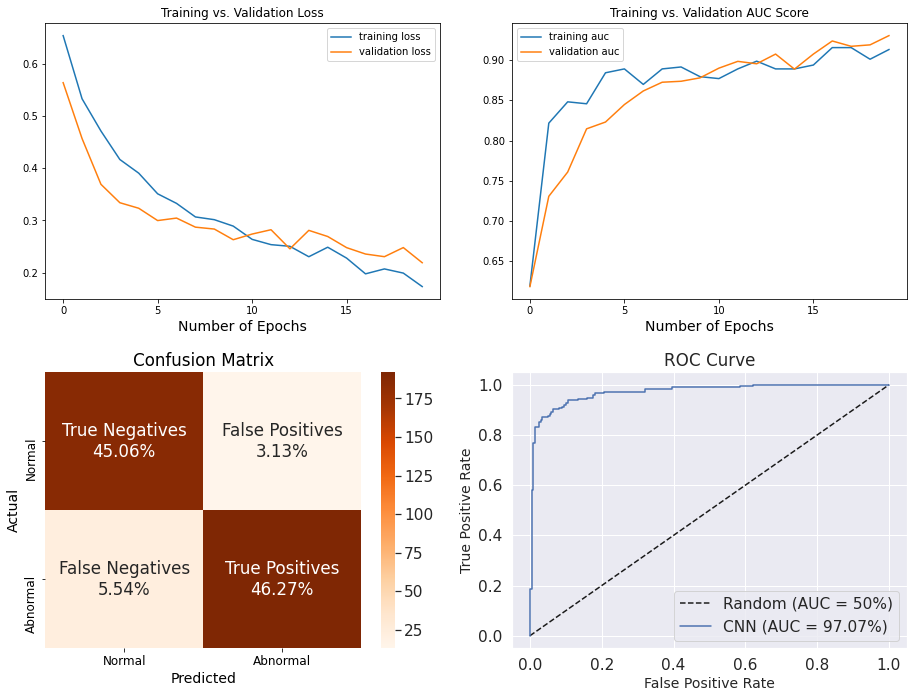

In [5]:
create_charts(cnn, cnn_model)

In [6]:
import numpy as np
from keras.preprocessing import image
import cv2
import os
import glob
img_dir=["/content/drive/MyDrive/NewDB/Test set/Non polyp/NonP1Test",
         "/content/drive/MyDrive/NewDB/Test set/Non polyp/NonP2Test",
         "/content/drive/MyDrive/NewDB/Test set/Non polyp/NonP3Test",
         "/content/drive/MyDrive/NewDB/Test set/Polyp/Polyp1Test",
         "/content/drive/MyDrive/NewDB/Test set/Polyp/Polyp2Test",
         "/content/drive/MyDrive/NewDB/Test set/Polyp/Polyp3Test"]

a=0
n=0         
#img_dir =  # Enter Directory of all images 
for img in img_dir:
  data_path = os.path.join(img,'*g')
  files = glob.glob(data_path)
  data = []
  
  for f1 in files:
      #img = cv2.imread(f1)
      #data.append(img)
      test_image= image.load_img(f1, target_size=(128,128))
      test_image=image.img_to_array(test_image)
      test_image= np.expand_dims(test_image, axis=0)
      result=cnn.predict(test_image)
      #print(result)
      prediction=[]
      if result[0][0] == 1:
          prediction='Abnormal'
      else:
          prediction='Normal'
      if prediction == 'Abnormal':
          a=a+1
      else:
          n=n+1
print("No. of total images =", a+n)

print("No. of polyp images in the test set = 215 ")

print("No. of polyp images predicted =", a)
#print(a)

print("No. of non polyp images in the test set = 200")

print("No. of non polyp images predicted =", n)
#print(n)

No. of total images = 415
No. of polyp images in the test set = 215 
No. of polyp images predicted = 143
No. of non polyp images in the test set = 200
No. of non polyp images predicted = 272
